# Goatools

In [63]:
from goatools.base import download_go_basic_obo
from goatools.obo_parser import GODag

In [77]:
import pandas as pd
import numpy as np

In [64]:
# 1. Download the Ontology Structure (The Dictionary) directly
obo_fname = download_go_basic_obo("go-basic.obo")

# 2. Load it into a Python Object
go_dag = GODag(obo_fname)

$ get http://purl.obolibrary.org/obo/go/go-basic.obo
requests.get(http://purl.obolibrary.org/obo/go/go-basic.obo, stream=True)
  WROTE: go-basic.obo

go-basic.obo: fmt(1.2) rel(2025-10-10) 42,666 Terms


In [65]:
type(go_dag), len(go_dag)  # Dictionary of GO Terms

(goatools.obo_parser.GODag, 42666)

In [70]:
type(go_dag.values())

dict_values

In [74]:
def get_term_depth(go_id):
    if go_id not in go_dag:
        return 0
    return go_dag[go_id].depth

def is_parent(parent_id, child_id):
    """Returns True if parent_id is an ancestor of child_id"""
    if child_id not in go_dag: return False
    term = go_dag[child_id]
    return parent_id in term.get_all_parents()

In [75]:
# 3. Check a term
term_id = 'GO:0003700'
print(f"Term: {go_dag[term_id].name}")
print(f"Depth: {get_term_depth(term_id)}") # Likely Depth 1 or 2 (Low specificity)

Term: DNA-binding transcription factor activity
Depth: 2


In [6]:
type(go_dag)

goatools.obo_parser.GODag

In [79]:
# Read the union of all genes
union_df = pd.read_csv('../data/union_genes_clustered_df.csv')
union_df

,gene_transcript,ENSG00000188976,ENSG00000187961,ENSG00000187608,ENSG00000160087,ENSG00000127054,ENSG00000162576,ENSG00000175756,ENSG00000242485,ENSG00000160072,...,ENSG00000198712,ENSG00000228253,ENSG00000198899,ENSG00000198938,ENSG00000198840,ENSG00000212907,ENSG00000198886,ENSG00000198786,ENSG00000198695,ENSG00000198727
0,10005_ZBTB4_P1_ENSG00000174282,-0.030201,-0.088615,0.097081,-0.050281,0.053923,0.047092,0.025221,-0.003499,-0.085795,...,0.319526,0.479325,0.232490,0.783892,0.759569,0.293088,0.485888,0.890428,0.252083,0.634143
1,10006_ZBTB5_P1P2_ENSG00000168795,-0.094131,0.093585,0.041780,0.011111,0.049495,0.068986,-0.062200,0.044283,-0.089965,...,0.045284,-0.076742,-0.120616,0.070922,0.016384,-0.156901,-0.037597,0.021802,0.063851,0.220182
2,10015_ZBTB8OS_P1P2_ENSG00000176261,0.042972,-0.122381,0.015089,-0.010220,0.021991,-0.140862,-0.131819,0.023055,-0.064811,...,-0.091865,0.015270,0.023904,-0.119254,-0.024721,-0.149914,-0.079422,0.134310,-0.018046,0.106836
3,10020_ZC3H13_P1P2_ENSG00000123200,-0.120841,-0.013023,0.690666,0.369722,0.229487,0.635588,0.187934,0.145091,-0.204043,...,0.421244,0.118716,1.633748,0.379121,0.741676,0.302818,0.341236,-0.045770,0.586778,0.497639
4,10022_ZC3H15_P1P2_ENSG00000065548,-0.069962,0.045348,-0.056278,0.054014,0.087813,-0.018570,-0.081548,0.034590,-0.071243,...,-0.056516,-0.100137,-0.184080,-0.184826,-0.338238,-0.107827,-0.124266,-0.230523,-0.098643,-0.313071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3625,9990_ZBTB38_P2_ENSG00000177311,-0.023088,0.074530,-0.028234,-0.102966,0.021527,-0.110965,-0.041697,-0.002252,-0.055727,...,0.077874,-0.041296,0.062638,0.081048,-0.016689,-0.107828,0.039389,-0.131908,0.007189,0.013382
3626,9991_ZBTB38_P1_ENSG00000177311,0.032109,0.040046,0.105273,0.070274,0.090874,0.093788,-0.022295,0.051294,0.058453,...,-0.038383,0.107337,0.132487,0.000794,0.048490,0.058422,0.086549,0.084963,-0.000500,0.017837
3627,9992_ZBTB39_P1P2_ENSG00000166860,-0.054780,-0.051475,0.206940,0.023562,-0.088279,-0.061373,0.207843,0.118381,-0.089880,...,0.477575,0.022448,0.245556,0.563584,0.508211,-0.165814,0.636640,0.252488,-0.188369,0.921252
3628,9998_ZBTB44_P1P2_ENSG00000196323,0.166343,0.202679,-0.026491,-0.038248,0.146278,-0.032702,0.019084,-0.108255,-0.100237,...,-0.152123,0.028410,-0.097497,-0.009866,0.307779,0.115760,0.009843,0.058135,0.210319,-0.117736


In [81]:
perturbations = union_df['gene_transcript'].tolist()
perturbations  = [i.split("_")[-1] for i in perturbations]
len(perturbations), len(set(perturbations))

(3630, 3483)

In [84]:
gene = union_df.columns[1:].tolist()
len(gene), len(set(gene))

(3460, 3460)

In [85]:
union = set(gene) | set(perturbations)
union = list(union)
len(union)

3604

# MyGene Module

In [2]:
import mygene

import pandas as pd
import numpy as np

from datetime import datetime

In [2]:
mg = mygene.MyGeneInfo()


In [6]:
mg.get_fields()

{'AllianceGenome': {'index': True, 'type': 'keyword'},
 'AnimalQTLdb': {'index': False, 'type': 'text'},
 'FLYBASE': {'index': True, 'type': 'keyword'},
 'HGNC': {'index': True, 'type': 'keyword'},
 'HPRD': {'index': True, 'type': 'keyword'},
 'MGI': {'index': True, 'type': 'keyword'},
 'MIM': {'index': True, 'type': 'keyword'},
 'RATMAP': {'index': True, 'type': 'keyword'},
 'RGD': {'index': True, 'type': 'keyword'},
 'SGD': {'index': True, 'type': 'keyword'},
 'TAIR': {'index': True, 'type': 'keyword'},
 'Vega': {'index': False, 'type': 'text'},
 'WormBase': {'index': True, 'type': 'keyword'},
 'Xenbase': {'index': True, 'type': 'keyword'},
 'ZFIN': {'index': True, 'type': 'keyword'},
 'accession': {'index': True, 'type': 'object'},
 'accession.genomic': {'index': False, 'type': 'text'},
 'accession.protein': {'analyzer': 'refseq_analyzer',
  'index': True,
  'searched_by_default': True,
  'type': 'text'},
 'accession.rna': {'analyzer': 'refseq_analyzer',
  'index': True,
  'searched

In [76]:
# Read the union of all genes
union_df = pd.read_csv('../data/union_genes_clustered_df.csv')
union_df

,gene_transcript,ENSG00000188976,ENSG00000187961,ENSG00000187608,ENSG00000160087,ENSG00000127054,ENSG00000162576,ENSG00000175756,ENSG00000242485,ENSG00000160072,...,ENSG00000198712,ENSG00000228253,ENSG00000198899,ENSG00000198938,ENSG00000198840,ENSG00000212907,ENSG00000198886,ENSG00000198786,ENSG00000198695,ENSG00000198727
0,10005_ZBTB4_P1_ENSG00000174282,-0.030201,-0.088615,0.097081,-0.050281,0.053923,0.047092,0.025221,-0.003499,-0.085795,...,0.319526,0.479325,0.232490,0.783892,0.759569,0.293088,0.485888,0.890428,0.252083,0.634143
1,10006_ZBTB5_P1P2_ENSG00000168795,-0.094131,0.093585,0.041780,0.011111,0.049495,0.068986,-0.062200,0.044283,-0.089965,...,0.045284,-0.076742,-0.120616,0.070922,0.016384,-0.156901,-0.037597,0.021802,0.063851,0.220182
2,10015_ZBTB8OS_P1P2_ENSG00000176261,0.042972,-0.122381,0.015089,-0.010220,0.021991,-0.140862,-0.131819,0.023055,-0.064811,...,-0.091865,0.015270,0.023904,-0.119254,-0.024721,-0.149914,-0.079422,0.134310,-0.018046,0.106836
3,10020_ZC3H13_P1P2_ENSG00000123200,-0.120841,-0.013023,0.690666,0.369722,0.229487,0.635588,0.187934,0.145091,-0.204043,...,0.421244,0.118716,1.633748,0.379121,0.741676,0.302818,0.341236,-0.045770,0.586778,0.497639
4,10022_ZC3H15_P1P2_ENSG00000065548,-0.069962,0.045348,-0.056278,0.054014,0.087813,-0.018570,-0.081548,0.034590,-0.071243,...,-0.056516,-0.100137,-0.184080,-0.184826,-0.338238,-0.107827,-0.124266,-0.230523,-0.098643,-0.313071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3625,9990_ZBTB38_P2_ENSG00000177311,-0.023088,0.074530,-0.028234,-0.102966,0.021527,-0.110965,-0.041697,-0.002252,-0.055727,...,0.077874,-0.041296,0.062638,0.081048,-0.016689,-0.107828,0.039389,-0.131908,0.007189,0.013382
3626,9991_ZBTB38_P1_ENSG00000177311,0.032109,0.040046,0.105273,0.070274,0.090874,0.093788,-0.022295,0.051294,0.058453,...,-0.038383,0.107337,0.132487,0.000794,0.048490,0.058422,0.086549,0.084963,-0.000500,0.017837
3627,9992_ZBTB39_P1P2_ENSG00000166860,-0.054780,-0.051475,0.206940,0.023562,-0.088279,-0.061373,0.207843,0.118381,-0.089880,...,0.477575,0.022448,0.245556,0.563584,0.508211,-0.165814,0.636640,0.252488,-0.188369,0.921252
3628,9998_ZBTB44_P1P2_ENSG00000196323,0.166343,0.202679,-0.026491,-0.038248,0.146278,-0.032702,0.019084,-0.108255,-0.100237,...,-0.152123,0.028410,-0.097497,-0.009866,0.307779,0.115760,0.009843,0.058135,0.210319,-0.117736


In [3]:
union_df.columns

Index(['gene_transcript', 'ENSG00000188976', 'ENSG00000187961',
       'ENSG00000187608', 'ENSG00000160087', 'ENSG00000127054',
       'ENSG00000162576', 'ENSG00000175756', 'ENSG00000242485',
       'ENSG00000160072',
       ...
       'ENSG00000198712', 'ENSG00000228253', 'ENSG00000198899',
       'ENSG00000198938', 'ENSG00000198840', 'ENSG00000212907',
       'ENSG00000198886', 'ENSG00000198786', 'ENSG00000198695',
       'ENSG00000198727'],
      dtype='object', length=3461)

In [82]:
perturbations = union_df['gene_transcript'].tolist()
len(perturbations), len(set(perturbations))

(3630, 3630)

In [83]:
perturbations  = [i.split("_")[-1] for i in perturbations]
len(perturbations), len(set(perturbations))

(3630, 3483)

In [6]:
gene = union_df.columns[1:].tolist()
len(gene), len(set(gene))

(3460, 3460)

In [22]:
union_df.shape

(3630, 3461)

In [8]:
len(set(gene).union(set(perturbations)))

3604

In [13]:
union = set(gene) | set(perturbations)
len(union)

3604

In [14]:
intersection = set(gene) & set(perturbations)
len(intersection)

3339

In [16]:
union = list(union)
union[:10]

['ENSG00000117410',
 'ENSG00000204520',
 'ENSG00000143633',
 'ENSG00000128652',
 'ENSG00000169139',
 'ENSG00000100949',
 'ENSG00000148843',
 'ENSG00000130203',
 'ENSG00000106263',
 'ENSG00000198492']

In [29]:
def fetch_go_data(gene_list):
    mg = mygene.MyGeneInfo()
    
    # 1. Query fields
    # We ask for go.BP (Process) and go.MF (Function)
    results = mg.querymany(gene_list, 
                           scopes='ensembl.gene', 
                           fields='symbol,go.BP,go.MF', 
                           species='human')
    
    bp_data, mf_data = [], []
    
    for item in results:
        gene = item.get('query')
        symbol = item.get('symbol', 'Unknown')
        # Skip if no GO data found
        if 'go' not in item:
            continue
            
        # 2. Extract Biological Process (BP) - "The Big Picture"
        # We normalize because sometimes it returns a dict (1 result) or list (many results)
        bp_raw = item['go'].get('BP', [])
        if isinstance(bp_raw, dict): bp_raw = [bp_raw]
        
        for entry in bp_raw:
            bp_data.append({
                'Gene': gene,
                'Gene_Symbol': symbol,
                'Type': 'Biological_Process',
                'GO_ID': entry.get('id'),
                'Term': entry.get('term'),
                'Evidence': entry.get('evidence'),
                'Category': 'BP'
            })
            
        # 3. Extract Molecular Function (MF) - "The Mechanism"
        mf_raw = item['go'].get('MF', [])
        if isinstance(mf_raw, dict): mf_raw = [mf_raw]
        
        for entry in mf_raw:
            mf_data.append({
                'Gene': gene,
                'Gene_Symbol': symbol,
                'Type': 'Molecular_Function',
                'GO_ID': entry.get('id'),
                'Term': entry.get('term'),
                'Evidence': entry.get('evidence'),
                'Category': 'MF'
            })

    return pd.DataFrame(bp_data), pd.DataFrame(mf_data)

In [30]:
bp_df, mf_df = fetch_go_data(union)
bp_df.head()

Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed
4 input query terms found no hit:	['ENSG00000112096', 'ENSG00000255823', 'nan', 'ENSG00000269028']


,Gene,Gene_Symbol,Type,GO_ID,Term,Evidence,Category
0,ENSG00000117410,ATP6V0B,Biological_Process,GO:0006811,monoatomic ion transport,IEA,BP
1,ENSG00000117410,ATP6V0B,Biological_Process,GO:0007035,vacuolar acidification,NAS,BP
2,ENSG00000117410,ATP6V0B,Biological_Process,GO:0007042,lysosomal lumen acidification,NAS,BP
3,ENSG00000117410,ATP6V0B,Biological_Process,GO:0016241,regulation of macroautophagy,NAS,BP
4,ENSG00000117410,ATP6V0B,Biological_Process,GO:0048388,endosomal lumen acidification,NAS,BP


In [34]:
bp_df.Gene.nunique(), bp_df.Gene_Symbol.nunique()

(3380, 3380)

In [35]:
mf_df.Gene.nunique(), mf_df.Gene_Symbol.nunique()

(3437, 3437)

In [36]:
mf_df.head()

,Gene,Gene_Symbol,Type,GO_ID,Term,Evidence,Category
0,ENSG00000117410,ATP6V0B,Molecular_Function,GO:0005515,protein binding,IPI,MF
1,ENSG00000117410,ATP6V0B,Molecular_Function,GO:0015078,proton transmembrane transporter activity,IEA,MF
2,ENSG00000117410,ATP6V0B,Molecular_Function,GO:0046961,"proton-transporting ATPase activity, rotationa...",IEA,MF
3,ENSG00000117410,ATP6V0B,Molecular_Function,GO:0046961,"proton-transporting ATPase activity, rotationa...",TAS,MF
4,ENSG00000204520,MICA,Molecular_Function,GO:0005515,protein binding,IPI,MF


In [37]:
mf_df.shape, bp_df.shape

((27091, 7), (42262, 7))

In [ ]:
#mf_df.to_csv('../data/ontology/go_annotations_molecular_function.csv', index=False)
#bp_df.to_csv('../data/ontology/go_annotations_biological_process.csv', index=False)

# Exploring the Molecular function

In [3]:
import pandas as pd
import numpy as np

In [4]:
mfdf = pd.read_csv('../data/ontology/go_annotations_molecular_function.csv')
mfdf.head()

,Gene,Gene_Symbol,Type,GO_ID,Term,Evidence,Category
0,ENSG00000117410,ATP6V0B,Molecular_Function,GO:0005515,protein binding,IPI,MF
1,ENSG00000117410,ATP6V0B,Molecular_Function,GO:0015078,proton transmembrane transporter activity,IEA,MF
2,ENSG00000117410,ATP6V0B,Molecular_Function,GO:0046961,"proton-transporting ATPase activity, rotationa...",IEA,MF
3,ENSG00000117410,ATP6V0B,Molecular_Function,GO:0046961,"proton-transporting ATPase activity, rotationa...",TAS,MF
4,ENSG00000204520,MICA,Molecular_Function,GO:0005515,protein binding,IPI,MF


In [5]:
mfdf.Evidence.unique()

array(['IPI', 'IEA', 'TAS', 'IDA', 'HDA', 'IBA', 'ISA', 'ISS', 'NAS',
       'IC', 'IMP', 'IGI', 'EXP', 'RCA', 'ND', 'IKR'], dtype=object)

In [6]:
tier_1 = ['EXP', 'IDA', 'IPI', 'IMP', 'IGI']

**EXP (Inferred from Experiment):** The general category for "A human did a lab experiment.

**IDA (Inferred from Direct Assay)**: A specific experiment verified the function (e.g., Enzyme assay). Very High Trust.

**IPI (Inferred from Physical Interaction)**: See previous answer. Proteins touching. Crucial for mechanism.

**IMP (Inferred from Mutant Phenotype)**: A scientist mutated/deleted the gene, and the cell stopped working.

**IGI (Inferred from Genetic Interaction):** How genes affect each other (e.g., if you mutate Gene A, Gene B stops working). Excellent for pathway discovery.

In [7]:
tier_2 = ['HDA']

**HDA (Inferred from High Throughput Direct Assay)**: Same as IDA (Direct Assay), but done at massive scale.

Note: Because it's high-throughput, there is a slightly higher false-positive rate than manual IDA, but it is generally considered experimental evidence.

In [8]:
tier_3 = ['IBA', 'ISS', 'IC', 'TAS']

**Tier 3: The "Inferred" (Curator & Evolution)**

Use with caution. These are logical deductions made by experts, but not direct experiments on this specific gene in this specific organism.

**IBA (Inferred from Biological aspect of Ancestor)**: Evolution-based. "This gene did X in the ancestor of humans and mice, so it probably does X in humans too."

**ISS (Inferred from Sequence or Structural Similarity)**: "This gene looks 90% like a known kinase, so it is probably a kinase."

**IC (Inferred by Curator)**: Logic-based. "If this protein is part of the 'Nuclear Pore Complex', then it must be located in the 'Nuclear Membrane'."

**TAS: Traceable Author Statement (The "Textbook Fact")** What it is: A curator read a scientific paper where the author explicitly stated: "Gene X is responsible for Process Y" and provided data or citations to back it up.

In [9]:
tier_4 = ['NAS', 'IEA', 'RCA', 'ND', 'IKR']

**Tier 4: The "Weak" or "Negative"**

Filter these out for Causal Discovery. They introduce too much noise or uncertainty.

**NAS (Non-traceable Author Statement)**: A paper mentioned this function but didn't provide data to back it up. It's basically "hearsay."

**IEA (Inferred from Electronic Annotation)**: The computer guess. No human review. Remove.

**RCA (Reviewed Computational Analysis)**: A computer guessed it, and a human glanced at it. Better than IEA, but still computational.

**ND (No Biological Data available)**: This literally means "We don't know." The gene might be listed, but the function is unknown. Delete these rows immediately.

**IKR (Inferred from Key Residues)**: A very specific type of sequence analysis (checking if the active site amino acids exist). Good for molecular function, but weak for biological process.

In [10]:
mfdf.head()

,Gene,Gene_Symbol,Type,GO_ID,Term,Evidence,Category
0,ENSG00000117410,ATP6V0B,Molecular_Function,GO:0005515,protein binding,IPI,MF
1,ENSG00000117410,ATP6V0B,Molecular_Function,GO:0015078,proton transmembrane transporter activity,IEA,MF
2,ENSG00000117410,ATP6V0B,Molecular_Function,GO:0046961,"proton-transporting ATPase activity, rotationa...",IEA,MF
3,ENSG00000117410,ATP6V0B,Molecular_Function,GO:0046961,"proton-transporting ATPase activity, rotationa...",TAS,MF
4,ENSG00000204520,MICA,Molecular_Function,GO:0005515,protein binding,IPI,MF


In [11]:
mfdf.Type.unique()

array(['Molecular_Function'], dtype=object)

In [12]:
mfdf.shape

(27091, 7)

In [13]:
mfdf.Gene.nunique(), mfdf.Gene_Symbol.nunique()

(3437, 3437)

In [14]:
unique_genes = mfdf.Gene.unique().tolist()
len(unique_genes)

3437

In [15]:
# filter genes based on the most trusted evidence
trusted_evidence = tier_1 + tier_2 + ['TAS']

unique_genes_trusted  = mfdf[mfdf['Evidence'].isin(trusted_evidence)].Gene.unique().tolist()
len(unique_genes_trusted)

print(f"there are {len(unique_genes)-len(unique_genes_trusted)} genes for which we do not have high evidence!")

there are 116 genes for which we do not have high evidence!


In [16]:
len(unique_genes_trusted)

3321

In [18]:
# find genes that do not have any GO annotations with trusted evidence
genes_without_trusted_evidence = set(unique_genes) - set(unique_genes_trusted)
len(genes_without_trusted_evidence)

116

In [17]:
# Combine tier 1, 2, and 3 evidence codes
combined_evidence = tier_1 + tier_2 + tier_3
# Filter genes with evidence not in combined_evidence
genes_tier_123 = mfdf[mfdf['Evidence'].isin(combined_evidence)].Gene.unique()

print(f"Number of genes for which the evidence did not belong to tier 1, 2, or 3: {len(unique_genes)-len(genes_tier_123)}")

Number of genes for which the evidence did not belong to tier 1, 2, or 3: 43


# Cluster Formation

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

In [51]:
mfdf.head()

,Gene,Gene_Symbol,Type,GO_ID,Term,Evidence,Category
0,ENSG00000117410,ATP6V0B,Molecular_Function,GO:0005515,protein binding,IPI,MF
1,ENSG00000117410,ATP6V0B,Molecular_Function,GO:0015078,proton transmembrane transporter activity,IEA,MF
2,ENSG00000117410,ATP6V0B,Molecular_Function,GO:0046961,"proton-transporting ATPase activity, rotationa...",IEA,MF
3,ENSG00000117410,ATP6V0B,Molecular_Function,GO:0046961,"proton-transporting ATPase activity, rotationa...",TAS,MF
4,ENSG00000204520,MICA,Molecular_Function,GO:0005515,protein binding,IPI,MF


In [ ]:
# Make clusters based on Molecular Function GO terms with high-confidence evidence but first analyse the types of functions
refined_mfdf = mfdf[mfdf['Evidence'].isin(trusted_evidence)]    # trusted_evidence = tier_1 + tier_2 + ['TAS']
refined_mfdf.shape

(12505, 7)

In [20]:
refined_mfdf.head()

,Gene,Gene_Symbol,Type,GO_ID,Term,Evidence,Category
0,ENSG00000117410,ATP6V0B,Molecular_Function,GO:0005515,protein binding,IPI,MF
3,ENSG00000117410,ATP6V0B,Molecular_Function,GO:0046961,"proton-transporting ATPase activity, rotationa...",TAS,MF
4,ENSG00000204520,MICA,Molecular_Function,GO:0005515,protein binding,IPI,MF
5,ENSG00000204520,MICA,Molecular_Function,GO:0030881,beta-2-microglobulin binding,IDA,MF
6,ENSG00000204520,MICA,Molecular_Function,GO:0046703,natural killer cell lectin-like receptor binding,IDA,MF


In [44]:
print(f"The number of unique genes with high-confidence Molecular Function GO annotations: {refined_mfdf['Gene'].nunique()}")

The number of unique genes with high-confidence Molecular Function GO annotations: 3321


In [34]:
genes_to_term  = refined_mfdf.groupby('Gene')['Term'].unique().to_dict()

In [45]:
# how many genes are have mutiple GO terms?
multi_term_genes = {gene: terms for gene, terms in genes_to_term.items() if len(terms) > 1}
print(f"Number of genes with multiple high-confidence Molecular Function GO terms: {len(multi_term_genes)}")

Number of genes with multiple high-confidence Molecular Function GO terms: 2487


In [50]:
single_term_genes = {gene: terms for gene, terms in genes_to_term.items() if len(terms) == 1}
print(f"Number of genes with one high-confidence Molecular Function GO term: {len(single_term_genes)}")

Number of genes with one high-confidence Molecular Function GO term: 834


In [48]:
# Lets summarise the number of genes before and after refinement, and after selecting only those with multiple GO terms
print("Summary of Gene Ontology Annotated Counts:")
print(f"Total number of unique genes in the original dataset: {mfdf['Gene'].nunique()}")
print(f"Total number of unique genes with high-confidence Molecular Function GO annotations: {refined_mfdf['Gene'].nunique()}")
print(f"Number of genes with multiple high-confidence Molecular Function GO terms: {len(multi_term_genes)}")


Summary of Gene Ontology Annotated Counts:
Total number of unique genes in the original dataset: 3437
Total number of unique genes with high-confidence Molecular Function GO annotations: 3321
Number of genes with multiple high-confidence Molecular Function GO terms: 2487


In [36]:
unique_terms = genes_to_term.values()
unique_terms = list(set([term for sublist in unique_terms for term in sublist]))
print(f"Number of unique Molecular Function GO terms: {len(unique_terms)}")

Number of unique Molecular Function GO terms: 1685


In [37]:
# lets visualise how many genes are associated with each term
term_to_genes = refined_mfdf.groupby('Term')['Gene'].unique().to_dict()
term_gene_counts = {term: len(genes) for term, genes in term_to_genes.items()}
term_gene_counts_df = pd.DataFrame.from_dict(term_gene_counts, orient='index', columns=['Gene_Count'])
term_gene_counts_df = term_gene_counts_df.sort_values(by='Gene_Count', ascending=False)
term_gene_counts_df.head()

,Gene_Count
protein binding,3077
RNA binding,735
identical protein binding,366
protein homodimerization activity,145
cadherin binding,127


In [59]:
term_gene_counts_df.shape

(1685, 1)

In [43]:
term_gene_counts_df.tail()

,Gene_Count
voltage-gated potassium channel activity involved in ventricular cardiac muscle cell action potential repolarization,1
voltage-gated potassium channel activity,1
voltage-gated chloride channel activity,1
4-hydroxybenzoate polyprenyltransferase activity,1
3-phosphoinositide-dependent protein kinase activity,1


In [53]:
term_gene_counts_df['Gene_Count'].value_counts().index

Index([   1,    2,    3,    4,    5,    6,    7,    8,   10,   11,    9,   16,
         13,   14,   23,   19,   15,   12,   31,   27,   25,   21,   30,   32,
         88,   58,   47,   39,   49,   18,   17,   35,   42,   44,   46,   45,
         50,   48,   55,   38,   51,   52,   71,   70,   68,   61,  735,  127,
        145,  366,   94,  100,  104,  122, 3077,   53,   20,   22,   28,   29,
         24,   26],
      dtype='int64', name='Gene_Count')

In [54]:
term_gene_counts_df['Gene_Count'].value_counts().values

array([873, 292, 118,  93,  60,  38,  32,  28,  15,  13,  13,   9,   9,
         8,   6,   6,   5,   5,   4,   3,   3,   3,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1])

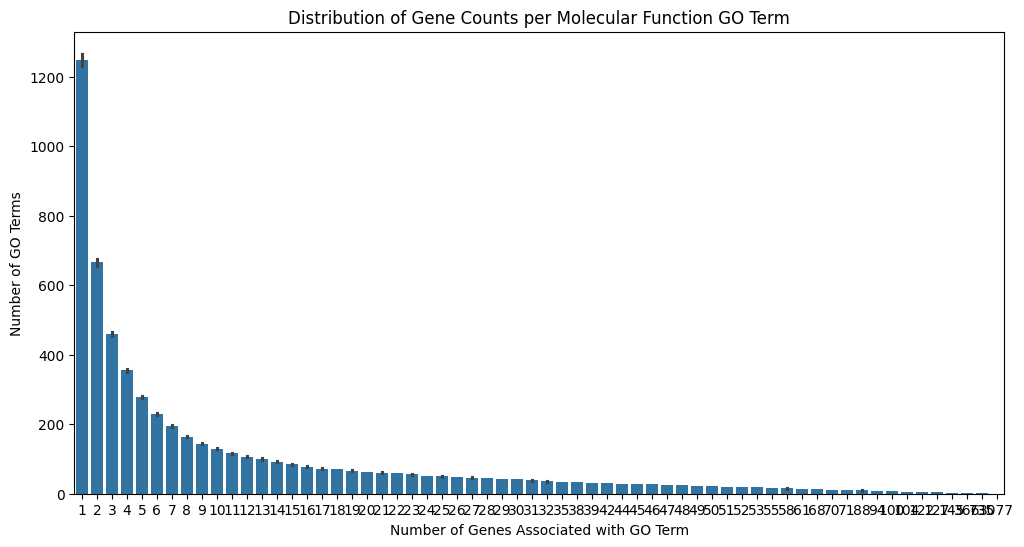

In [62]:
# visualise the number of genes associated with each GO term         
plt.figure(figsize=(12, 6))
sns.barplot(x=term_gene_counts_df['Gene_Count'].to_list(),
            y=[i for i in range(len(term_gene_counts_df.index))])
plt.title('Distribution of Gene Counts per Molecular Function GO Term')
plt.xlabel('Number of Genes Associated with GO Term')
plt.ylabel('Number of GO Terms')
plt.show()